In [ ]:
import cv2
import torch

# Import DAv2 code
import sys
sys.path.append("./")
from Depth_Anything_V2.depth_anything_v2.dpt import DepthAnythingV2

# From https://github.com/DepthAnything/Depth-Anything-V2#use-our-models
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vitl' # or 'vits', 'vitb', 'vitg'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f"Depth_Anything_V2/checkpoints/depth_anything_v2_{encoder}.pth", weights_only=True, map_location='cpu'))
model = model.to(DEVICE).eval()

xFormers not available
xFormers not available


In [8]:
raw_img.shape

(1080, 1920, 3)

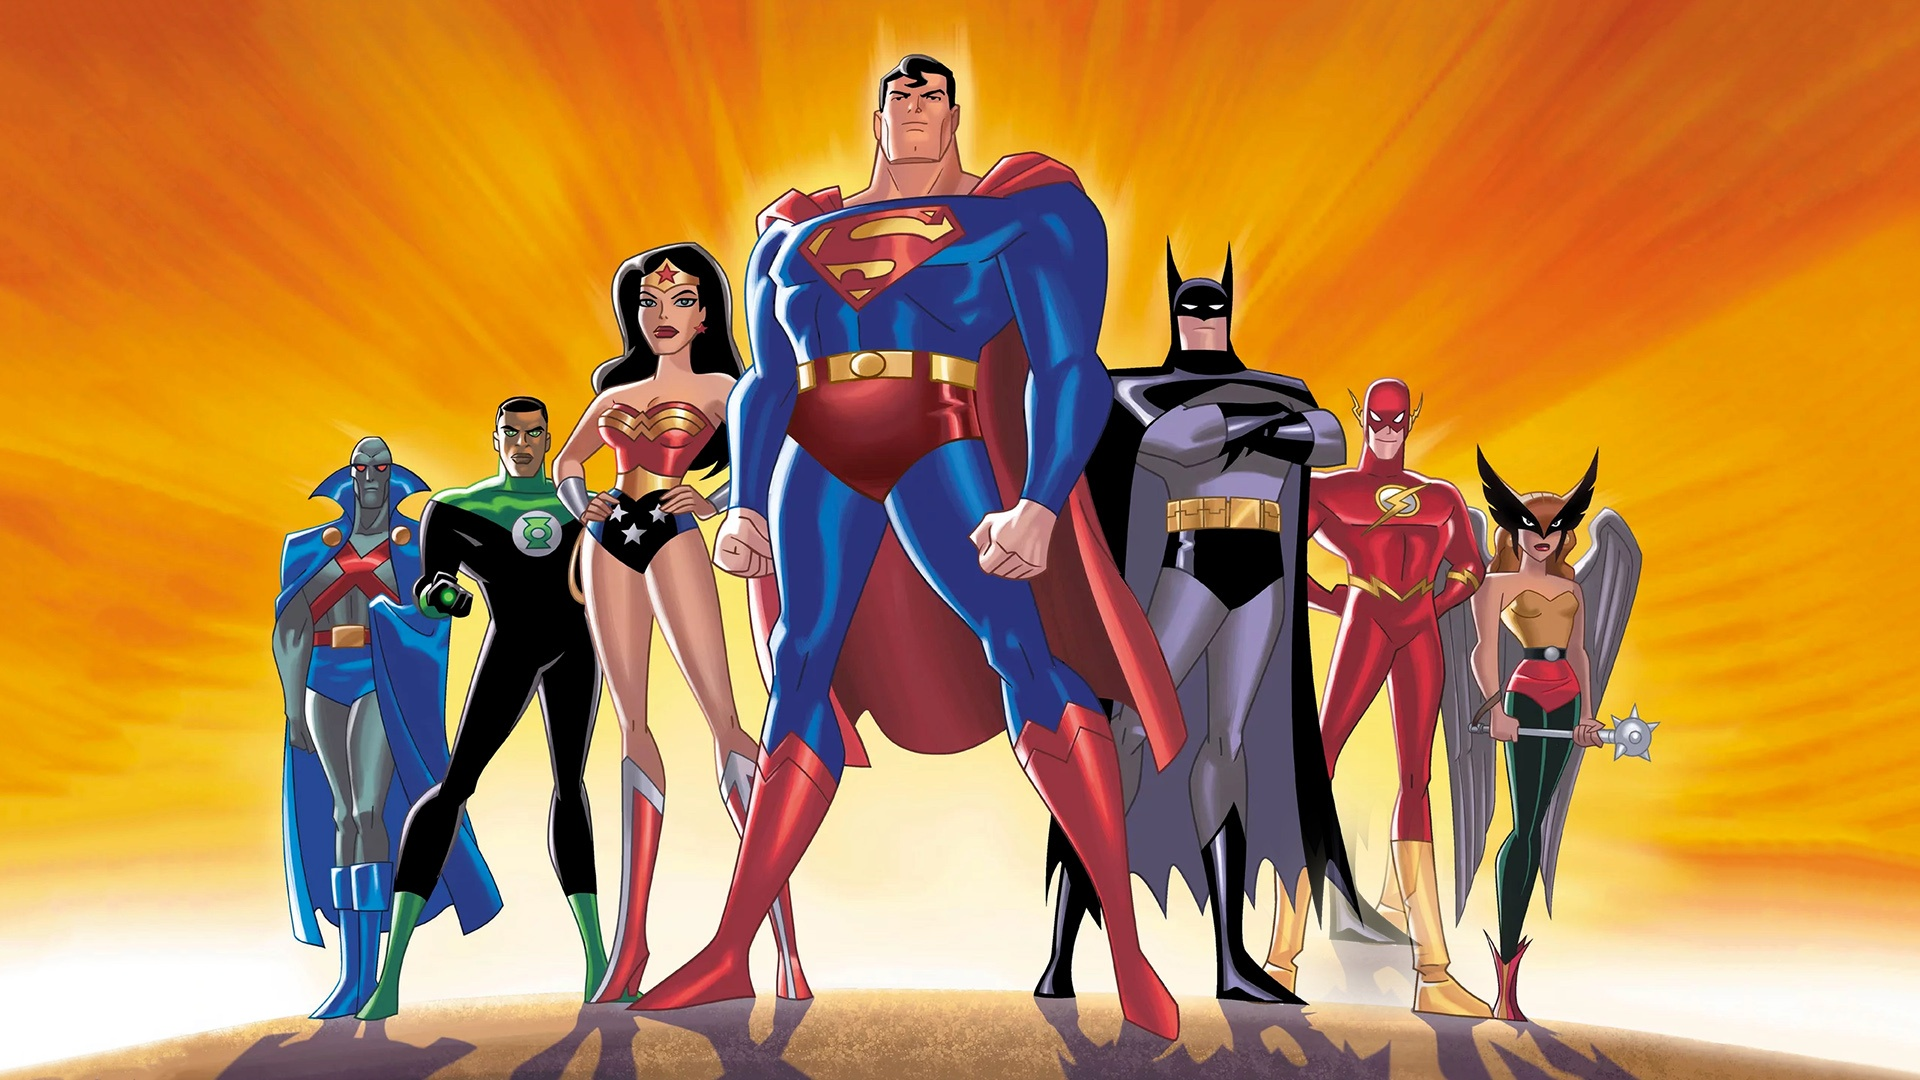

In [6]:
from IPython.display import Image

raw_img = cv2.imread('/home/tjw/Downloads/Image Picka/justice-league-63294fe48b870.jpg')
_, encoded_img = cv2.imencode('.jpg', raw_img)
Image(data=encoded_img)


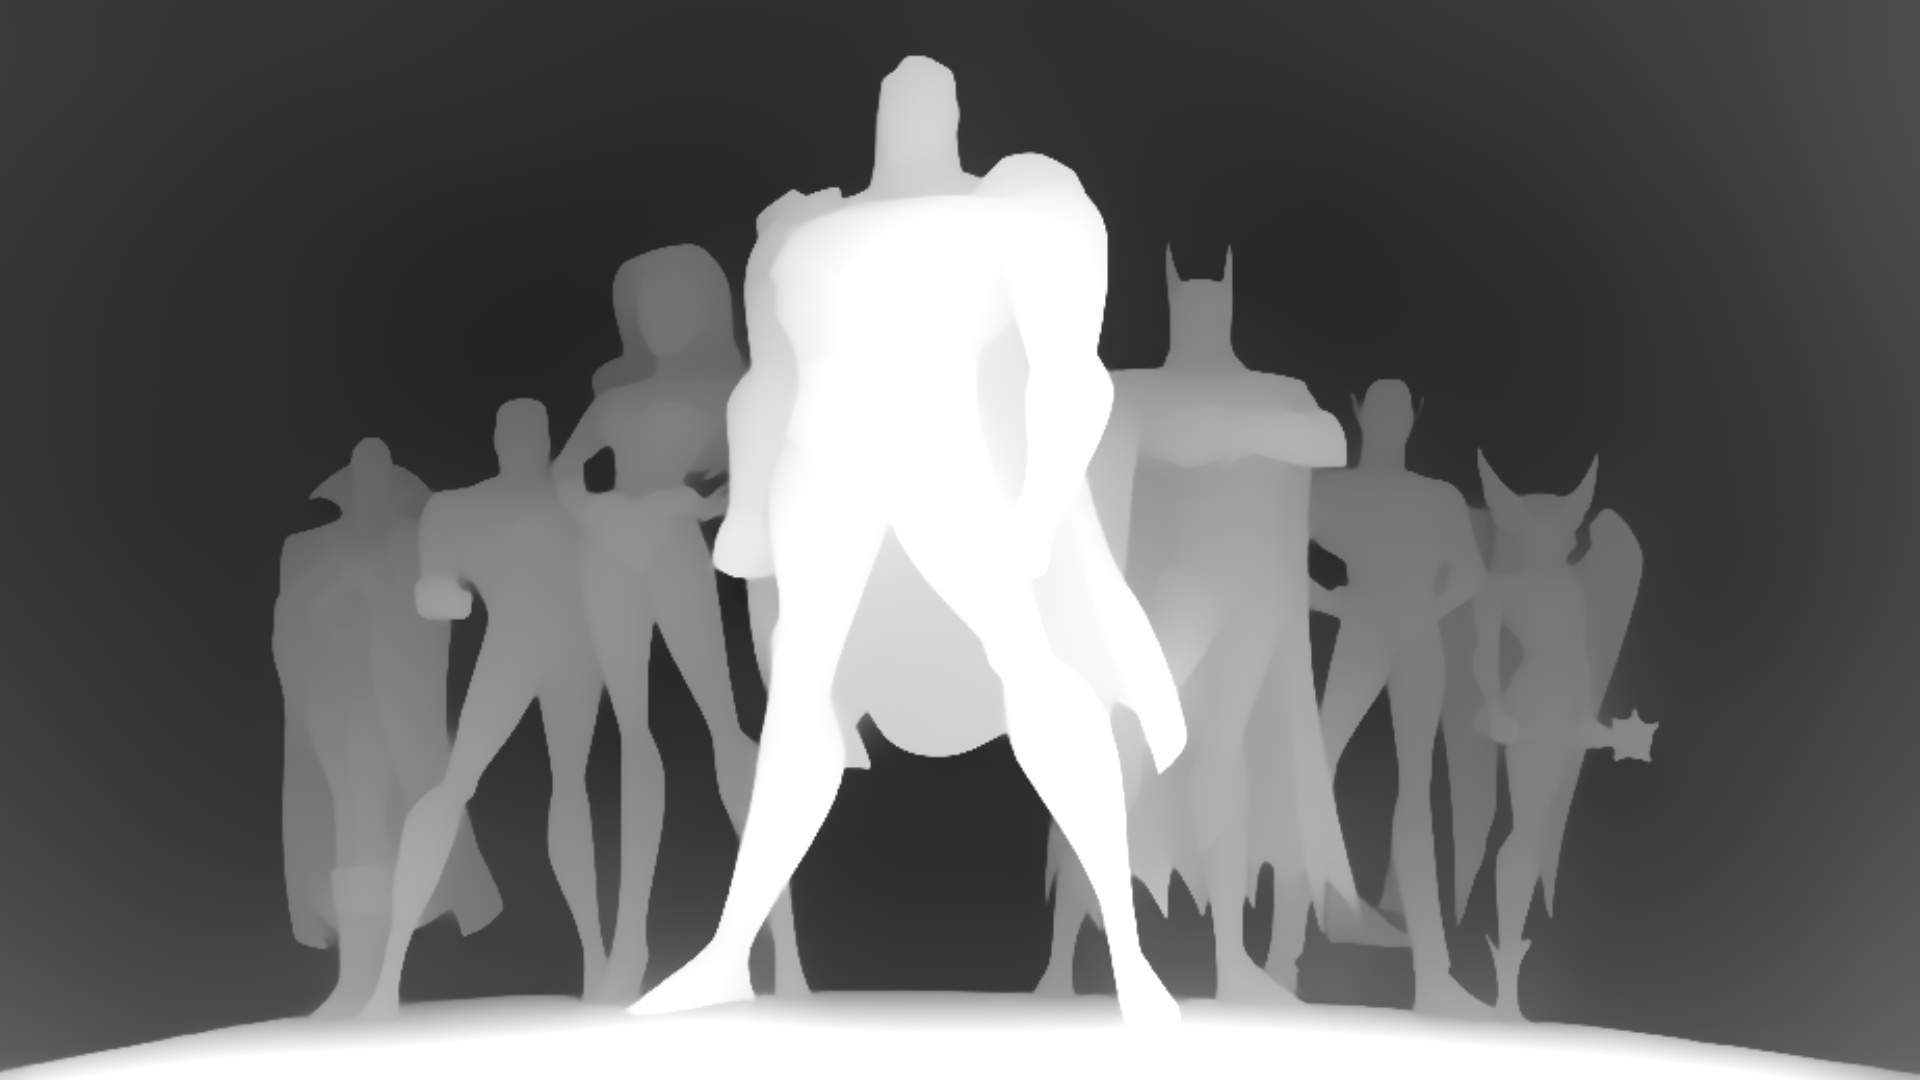

In [7]:
depth = model.infer_image(raw_img) # HxW raw depth map in numpy
_, encoded_img = cv2.imencode('.jpg', depth)
Image(data=encoded_img)